## Clustering

This notebook will use data from the 2014 boston marathon to cluster runner results

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv("data/boston marathon results (2014).csv")

In [3]:
df.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [4]:
df.shape

(31984, 21)

### Data Preprocessing

clean up the data so we can run some clustering on it

In [5]:
df = df.drop_duplicates()

In [6]:
# convert rows to numeric if they have odd characters
df["5k"] = df["5k"].replace("-", np.nan)
df["25k"] = df["25k"].replace("-", np.nan)
df["10k"] = df["10k"].replace("-", np.nan)
df["20k"] = df["20k"].replace("-", np.nan)
df["30k"] = df["30k"].replace("-", np.nan)
df["35k"] = df["35k"].replace("-", np.nan)
df["40k"] = df["40k"].replace("-", np.nan)
df["half"] = df["half"].replace("-", np.nan)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31984 entries, 0 to 31983
Data columns (total 21 columns):
10k          31934 non-null object
name         31984 non-null object
division     31984 non-null int64
25k          31768 non-null object
gender       31984 non-null object
age          31984 non-null int64
official     31984 non-null float64
bib          31984 non-null object
genderdiv    31984 non-null int64
ctz          1244 non-null object
35k          31950 non-null object
overall      31984 non-null int64
pace         31984 non-null float64
state        29408 non-null object
30k          31944 non-null object
5k           31932 non-null object
half         31912 non-null object
20k          31933 non-null object
country      31984 non-null object
city         31983 non-null object
40k          31945 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 5.4+ MB


In [8]:
df = df.drop(columns=[
    "name",
    "gender",
    "bib",
    "ctz",
    "state",
    "city",
    "country"
])

In [9]:
clean_df = df.dropna().copy()

In [10]:
for column in clean_df.columns:
    try:
        clean_df[column] = clean_df[column].astype(float)
    except:
        print(column)

In [11]:
clean_df = clean_df.drop_duplicates()

In [12]:
clean_df.shape

(31649, 14)

### Cluster Initialization

In [13]:
# get some clustering models ready and start clustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import normalize

# import some metrics we'll use to validate our models
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score

In [14]:
normalized_values = normalize(clean_df)
core_components = PCA(3).fit_transform(normalized_values)

In [15]:
core_components

array([[ 0.39277868,  0.98444981,  0.71483983],
       [ 0.33471793,  0.99740742,  0.74421636],
       [ 0.37547513,  1.00753319,  0.75857937],
       ...,
       [-0.0611546 ,  0.03257953, -0.08353371],
       [-0.05547255,  0.03022372, -0.08421374],
       [ 0.04686215, -0.09423018,  0.03811787]])

In [16]:
core_components[:, 0]

array([ 0.39277868,  0.33471793,  0.37547513, ..., -0.0611546 ,
       -0.05547255,  0.04686215])

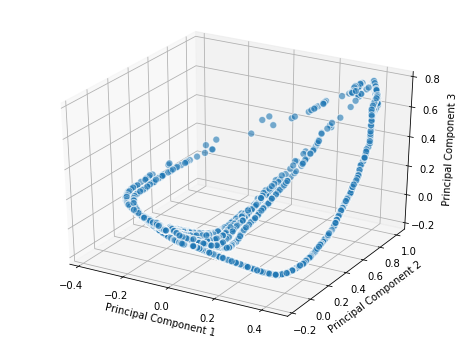

In [17]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = core_components[:, 0]
ys = core_components[:, 1]
zs = core_components[:, 2]
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.show()

In [18]:
# create our KMeans clusters

kmeans = KMeans(
    n_clusters=3,
    init="random"
)

In [19]:
kmeans.fit(core_components)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [20]:
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[ 0.35129669  0.1830878  -0.07024963]
 [ 0.07009183 -0.0849223   0.03643724]
 [-0.15203143  0.04326604 -0.02048727]]
[0 0 0 ... 2 2 1]


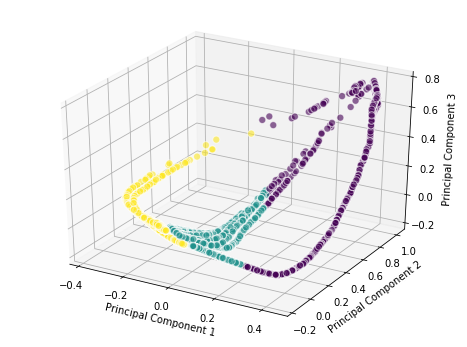

In [21]:
# plot the clusters
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = core_components[:, 0]
ys = core_components[:, 1]
zs = core_components[:, 2]
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w', c=kmeans.labels_)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.show()


In [22]:
# check the silhouette score
from sklearn.metrics import silhouette_score
# compute the silhouette score to compare this model against different varients of itself and others
labels = kmeans.labels_

score = silhouette_score(core_components, labels, metric="euclidean")
print("Silhouette Score for KMeans is: {}".format(score))

Silhouette Score for KMeans is: 0.4793368782006297


In [23]:
# plot the clusters
from mpl_toolkits.mplot3d import Axes3D
def plot_clusters(data, cluster_labels, title=""):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    xs = data[:, 0]
    ys = data[:, 1]
    zs = data[:, 2]
    ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w', c=cluster_labels)

    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    
    ax.set_title(title)
    plt.show()

In [24]:
from sklearn.metrics import silhouette_score
def compare_clustering_algorithms(models, data):
    
    scores = {}
    
    for name, model in models.items():
        # go through each and compute the silhouette score for each
        print("Running Model: {}".format(name))
        model.fit(data)
        
        labels = model.labels_
        plot_clusters(data, labels, "Cluster assignment using {}".format(name))
        
        # compute the silouette score
        
        s_score = silhouette_score(data, labels, metric="euclidean")
        
        scores[name] = s_score
    
    # plot a bar graph of the scores
    x_values = []
    y_values = []
    for name, value in scores.items():
        x_values.append(name)
        y_values.append(value)
    sns.barplot(x=x_values, y=y_values)

In [25]:
# create some models
models = {}

# create mean shift
mean_shift = MeanShift()
models["MeanShift"] = mean_shift

# create spectral shift
spectral_shift = SpectralClustering()

models["Spectral Shift"] = spectral_shift

# create affinity propagation
affinity_prop = AffinityPropagation()
models["Affinity Propagation"] = affinity_prop


Running Model: MeanShift


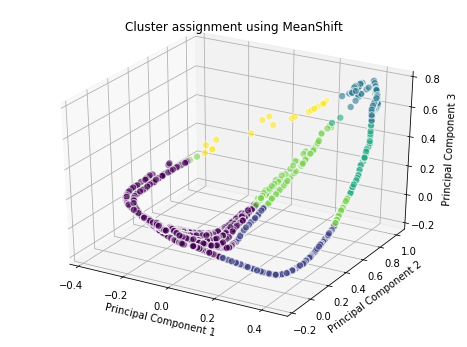

Running Model: Spectral Shift


In [ ]:
# run those models
compare_clustering_algorithms(models, core_components)

Seems like the chart above shows that we have a high grouping rate when we use more clusters.

In [ ]:
To be continued...